# Air Quality Prediction in Hyderabad in COVID affected times (1st October 2019 to 30th April 2020)

## We'll be using multiple weather and air quality related features to try and predict the impact that certain factors can have on air quality and try to build a model which can predict air quality for a given set of such factors.

## We'll be using PM2.5 as the air quality metric and target variable

# By : Karthik Sabareesh


## Github: https://github.com/KarthikSabareesh

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sb

## Importing dataset

In [113]:
df=pd.read_csv("/content/Hyderabad-AirQ.csv")
print(df.head(20))

          Date  Humidity  Wind Speed  Dew Point  Temperature  Pressure  \
0   01-10-2019      83.0         4.5       76.0         81.9      28.1   
1   02-10-2019      81.6         4.6       77.4         83.8      28.1   
2   03-10-2019      82.0         3.7       75.3         81.7      28.1   
3   04-10-2019      85.4         2.7       73.9         78.6      28.1   
4   05-10-2019      87.4         3.5       75.3         79.4      28.1   
5   06-10-2019      86.3         2.5       73.3         77.9      28.1   
6   07-10-2019      82.9         2.4       76.0         81.6      28.1   
7   08-10-2019      86.2         3.1       76.3         80.8      28.0   
8   09-10-2019      88.7         1.7       74.5         78.1      28.0   
9   10-10-2019      85.6         3.4       72.9         77.3      28.1   
10  11-10-2019      83.4         3.2       73.3         78.6      28.1   
11  12-10-2019      84.3         2.2       76.4         82.0      28.1   
12  13-10-2019      85.2         2.3  

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         153 non-null    object 
 1   Humidity     153 non-null    float64
 2   Wind Speed   153 non-null    float64
 3   Dew Point    153 non-null    float64
 4   Temperature  153 non-null    float64
 5   Pressure     153 non-null    float64
 6   Festival     153 non-null    int64  
 7   Lockdown     153 non-null    int64  
 8   Covid-Case   153 non-null    int64  
 9   PM2.5        153 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 12.1+ KB


### No null values found

## Here, date is a string object, which acts moreso as an index than anything. It's easier to remove date from this dataset and use numeric a day count attribute for our calculations, after establishing a baseline date '01-10-2019' as Day 0.

In [115]:
df["Days"]=np.arange(0,153)

## Train Test Split

In [116]:
df.drop("Date",axis=1,inplace=True)
y=df["PM2.5"]
X=df.drop("PM2.5",axis=1)

X_train_full,X_test_full,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

print(X_train_full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 73 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     107 non-null    float64
 1   Wind Speed   107 non-null    float64
 2   Dew Point    107 non-null    float64
 3   Temperature  107 non-null    float64
 4   Pressure     107 non-null    float64
 5   Festival     107 non-null    int64  
 6   Lockdown     107 non-null    int64  
 7   Covid-Case   107 non-null    int64  
 8   Days         107 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 8.4 KB
None


In [117]:
df.corr()["PM2.5"]

Humidity       0.120892
Wind Speed    -0.250983
Dew Point     -0.444527
Temperature   -0.548953
Pressure       0.415978
Festival       0.120983
Lockdown      -0.382253
Covid-Case    -0.386669
PM2.5          1.000000
Days          -0.196542
Name: PM2.5, dtype: float64

### We can see strong linear correlation between the target and features like temperature,Covid-Case,Pressure,Lockdown,Dew Point,etc.

## Let's run some models in current dataset to establish a baseline and get an idea of how the current dataset works as it is right now

In [118]:
model1=RandomForestRegressor(n_estimators=500,random_state=0)

model1.fit(X_train_full,y_train)

pred1=model1.predict(X_test_full)

print(pred1)

from sklearn.metrics import r2_score

r2_1=r2_score(y_test, pred1)
print(r2_1)

[ 78.366  87.22  148.042  94.694  82.29   90.218 144.87   92.92   97.36
 150.416 152.39  111.572 150.052  84.458  90.55  145.576  86.732  98.936
 153.414 105.35  147.056 107.442 105.144 151.742 127.754  98.11   99.22
 152.32  146.156 153.112  92.054  99.894  93.514 109.846  75.652 156.132
 107.114  87.01   85.746  76.026  72.966 148.42   95.486 152.124  91.114
  80.184]
0.7147788201860874


In [119]:
model2=XGBRegressor(n_estimators=500,learning_rate=0.05,random_state=0)

model2.fit(X_train_full,y_train)

pred2=model2.predict(X_test_full)

print(pred2)

from sklearn.metrics import r2_score,mean_squared_error

r2_2=r2_score(y_test, pred2)
print(r2_2)


[ 75.337036  84.73281  147.75012   88.06462   80.91715   86.88756
 133.05147   88.35396   95.7978   149.84828  151.0241   117.21659
 161.37648   86.20689   88.67725  141.0428    76.32165  100.983116
 151.21692  100.35346  152.6691   111.116936 104.05986  144.25941
 129.12775  107.666855  95.038536 148.40051  120.097374 162.51823
  95.664444 105.67151   89.67801  114.839745  88.313095 151.62723
 112.70196   86.92953   83.528694  62.2439    61.29571  143.88844
  83.57996  152.0048    79.258354  76.39961 ]
0.6948374109994158


In [120]:
from lightgbm import LGBMRegressor

model3=LGBMRegressor(n_estimators=700,learning_rate=0.01)

model3.fit(X_train_full,y_train)

pred3=model3.predict(X_test_full)

print(pred3)

from sklearn.metrics import r2_score,mean_squared_error

r2_3=r2_score(y_test, pred3)
print(r2_3)


[ 89.71185784  92.76564905 152.37913668  93.07520765  96.98381173
  91.06473685 154.73361527  90.83243689  97.16371144 152.27911302
 147.88376064 129.42097582 148.17183264  89.20741425  91.30465536
 140.88767777  89.45202633  96.37596899 151.8916705   90.66083049
 158.45789299  89.92777372  99.02297711 149.86140087 139.11084035
 117.04702187  92.76564905 153.71288475 143.8345922  154.01938545
  84.32848942  92.01845374  91.11996881 117.55630588  90.60603676
 154.52278443 117.51915086  90.66083049  82.64246143  86.61853787
  85.99506066 155.09491274  84.32848942 156.69660484  86.84304188
  83.68190757]
0.6968051513290602


In [121]:
from sklearn.svm import SVR

model4=SVR(kernel='linear')

model4.fit(X_train_full,y_train)

pred4=model4.predict(X_test_full)

print(pred4)

r2_4=r2_score(y_test, pred4)
print(r2_4)



[ 83.81399408  97.04724366 144.57469836 111.65529708  96.39612999
  93.59877702 126.30150241   6.7475996  115.06672148 140.56971494
 134.65575331 114.11640209 156.29469911  82.36733109  95.64549927
 120.09691057  95.5232101  109.2359048  141.97001246  91.20962069
 140.92350248 117.82511799 112.07671307 161.78955933 116.75204171
 103.19537672  98.26758858 121.65056743 142.6966687  130.85858116
 105.21264692 113.58630071 108.95825653 123.10515369 109.92981095
 154.99478278 121.86325534 101.56740393  88.01807224  81.56891378
  97.50165185 123.56762547  97.40657224 140.21337903  99.29981892
  74.00683799]
0.4812449416650507


Above examples show that it is safe to assume RandomForestRegressor will be bebst suited model for this dataset

### Boxplot of data

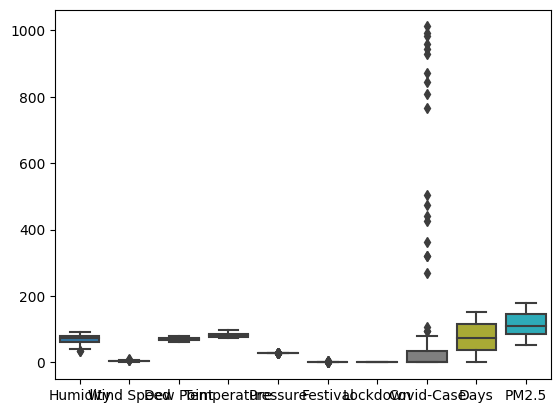

In [122]:
train_data=pd.concat((X_train_full,y_train),axis=1)
sb.boxplot(data=train_data)
plt.show()

## Removing Outliers

In [123]:
print("Old Shape: ", train_data.shape)
Q1 = train_data['Covid-Case'].quantile(0.25)
Q3 = train_data['Covid-Case'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(upper)
print(lower)

train_data.drop(train_data[train_data["Covid-Case"]<lower].index,inplace=True)
train_data.drop(train_data[train_data["Covid-Case"]>upper].index,inplace=True)
print("New Shape: ", train_data.shape)

Old Shape:  (107, 10)
87.5
-52.5
New Shape:  (86, 10)


In [124]:
y_train_2=train_data["PM2.5"]
X_train_2=train_data.drop("PM2.5",axis=1)

model1.fit(X_train_2,y_train_2)

pred_out=model1.predict(X_test_full)

print(pred_out)

r2_out=r2_score(y_test, pred_out)
print(r2_out)
rmse_out=mean_squared_error(y_test, pred_out,squared=False)
print(rmse_out)


[ 72.384  95.328 149.414  92.672  75.956  90.786 148.064  92.968  92.218
 148.766 152.786 117.368 150.13   99.124  90.418 146.794  79.104  90.68
 154.556 100.636 146.296 106.092 105.26  150.844 134.684 103.512 105.66
 153.414 146.518 153.23   92.736  97.948  91.964 120.154  72.114 155.86
 114.818  96.892  78.264  93.66   97.906 150.874  95.464 153.556  90.31
  94.624]
0.732385749203825
18.254476284867298


## Mutual Information

In [125]:
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 73 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     86 non-null     float64
 1   Wind Speed   86 non-null     float64
 2   Dew Point    86 non-null     float64
 3   Temperature  86 non-null     float64
 4   Pressure     86 non-null     float64
 5   Festival     86 non-null     int64  
 6   Lockdown     86 non-null     int64  
 7   Covid-Case   86 non-null     int64  
 8   Days         86 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 6.7 KB


In [126]:
y_train_2.info()

<class 'pandas.core.series.Series'>
Int64Index: 86 entries, 73 to 47
Series name: PM2.5
Non-Null Count  Dtype
--------------  -----
86 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


In [127]:
from sklearn.feature_selection import mutual_info_regression

initial_MI=mutual_info_regression(X_train_2,y_train_2,random_state=0)
initial_MI = pd.Series(initial_MI, name="MI Scores", index=X.columns)
initial_MI = initial_MI.sort_values(ascending=False)

print(initial_MI)

Days           0.427147
Temperature    0.310084
Humidity       0.301199
Wind Speed     0.155601
Dew Point      0.110848
Covid-Case     0.105655
Pressure       0.086923
Lockdown       0.060665
Festival       0.044855
Name: MI Scores, dtype: float64


## PCA

In [128]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_train_imp_pca = pca.fit_transform(X_train_2)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_train_imp_pca.shape[1])]
X_train_imp_pca = pd.DataFrame(X_train_imp_pca, columns=component_names)

X_train_imp_pca.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,11.274882,-8.853211,1.875470,-1.736656,-1.334790,-0.427438,0.155394,-0.000573,0.032339
1,-58.088808,12.324946,3.337216,1.316142,0.096955,-0.403140,0.087246,0.010757,-0.018289
2,-16.817718,0.633434,6.119764,-3.438686,0.801001,0.582948,0.318970,-0.023410,-0.060727
3,-51.137750,8.485407,0.421872,-1.542997,-0.190529,-0.461963,0.092046,0.011129,0.007922
4,37.302710,-10.455413,11.422607,1.339546,-1.490197,-0.498289,-0.864055,-0.029724,0.103233
5,81.599140,46.380312,-5.534578,-3.403410,-0.748530,-0.185316,0.020537,-0.160631,-0.027822
6,-3.204014,-7.699956,-6.507594,1.139425,1.011946,-0.314779,-0.029541,-0.001324,-0.067064
7,9.394190,-8.715614,2.127499,-4.216869,-2.059454,0.474484,-0.045130,-0.013267,0.043191
8,21.386033,-13.743046,-3.442840,-0.208710,0.778621,2.682785,-0.121102,-0.045304,-0.049285
9,-3.949734,-10.234275,-11.973205,-0.808491,1.615867,-0.392790,-0.479526,-0.001330,-0.043314


In [129]:
X_test_imp_pca = pca.transform(X_test_full)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_test_imp_pca.shape[1])]
X_test_imp_pca = pd.DataFrame(X_test_imp_pca, columns=component_names)

X_test_imp_pca.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-34.555775,6.215840,3.258137,4.556957,-0.433197,3.706087,-0.042233,-0.037627,-0.029864
1,204.534897,423.061395,-167.825987,-80.916782,5.713472,-0.102408,0.233942,-7.310100,0.574269
2,-3.717948,-11.240356,-14.134387,-1.174510,-1.732131,-0.541682,-0.876690,0.006043,-0.061950
3,42.876679,-15.288045,1.316740,6.559257,-0.822410,-0.192935,0.080104,-0.019435,-0.005803
4,-37.650264,5.275625,-0.339670,3.172363,-0.055760,-0.320581,0.172181,0.020106,0.084160
5,-54.782927,9.405414,-1.596464,1.892648,-0.668841,2.555138,-0.500660,-0.013515,0.080959
6,-18.070799,-1.571184,-0.761940,-1.743374,0.214454,0.562477,-0.121955,-0.008774,0.031046
7,38.018398,-15.378173,-2.746204,9.627873,22.267641,3.672160,1.006598,-0.096373,0.140319
8,57.100680,2.550345,1.114624,2.332867,-1.446275,-0.396611,-1.027652,-0.363537,0.008592
9,-6.820880,-3.252867,3.674373,-3.453619,-1.092662,1.515798,0.013234,-0.031999,-0.065205


In [130]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_train_2.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Humidity,-0.276425,-0.268777,-0.858123,0.072408,0.021158,-0.041542,-0.327956,-0.001310,-0.000658
Wind Speed,0.019277,0.003562,0.007396,0.109056,0.992127,0.035786,0.045027,-0.002040,0.006211
Dew Point,-0.075545,0.064212,-0.214974,0.658272,-0.105166,0.110636,0.698067,0.005775,-0.001914
Temperature,0.059075,0.228887,0.208477,0.713423,-0.051192,-0.071824,-0.619532,-0.003906,-0.008406
Pressure,0.000019,-0.001704,-0.000884,-0.006567,0.006599,-0.000173,0.004996,-0.076046,-0.997046
Festival,-0.001729,-0.002410,0.003701,-0.022627,-0.026946,0.989676,-0.138298,-0.012427,0.000054
Lockdown,0.004379,0.014403,-0.005183,-0.004516,0.002876,0.011437,-0.008023,0.996865,-0.076046
Covid-Case,0.251105,0.873771,-0.372800,-0.184243,0.014576,0.001044,0.007904,-0.016381,0.001441
Days,0.922467,-0.327937,-0.186743,0.077772,-0.023759,0.001981,-0.004746,0.000078,0.000044


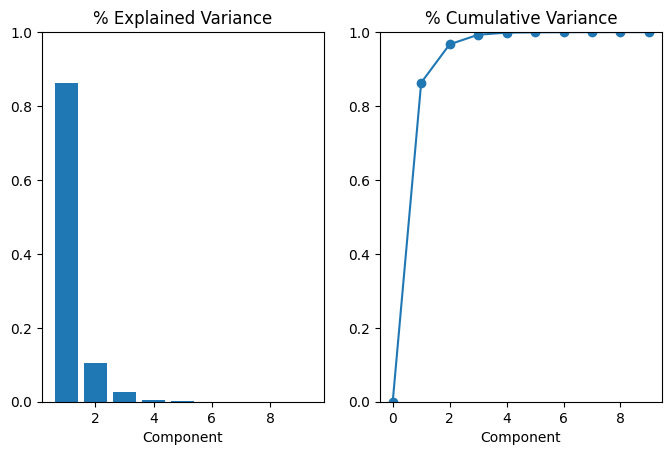

In [131]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

In [132]:
MI_2=mutual_info_regression(X_train_imp_pca,y_train_2,random_state=0)
MI_2 = pd.Series(MI_2, name="MI Scores", index=X_train_imp_pca.columns)
MI_2 = MI_2.sort_values(ascending=False)

print(MI_2)

PC2    0.364587
PC1    0.362264
PC4    0.257496
PC6    0.211468
PC8    0.122342
PC9    0.022506
PC7    0.005720
PC3    0.000000
PC5    0.000000
Name: MI Scores, dtype: float64


In [133]:
X_train_imp_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

### Testing out PCA features

In [134]:
model1.fit(X_train_imp_pca,y_train_2)

pred_pca=model1.predict(X_test_imp_pca)

print(pred_pca)

r2_pca=r2_score(y_test, pred_pca)
print(r2_pca)


[ 82.848 105.97  138.924  89.116  94.292  94.168 150.468  94.03   90.41
 149.222 146.122  99.07  155.2   106.414  87.374  92.714  75.596  84.06
 150.236  93.01  152.28   97.436 107.174 147.004 106.202  96.65  106.392
 146.304 151.002 144.76  103.72  106.242  90.2   119.174  83.52  150.428
  96.88  105.774  73.81  104.032 104.362 150.416  82.652 155.746 112.15
 104.362]
0.5687651439643082


## Testing out combinations of both

In [135]:
pca_features=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

X_train_new=X_train_2.copy()
X_train_new[pca_features]=X_train_imp_pca[pca_features]

X_test_new=X_test_full.copy()
X_test_new[pca_features]=X_test_imp_pca[pca_features]

print(X_test_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 26 to 150
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     46 non-null     float64
 1   Wind Speed   46 non-null     float64
 2   Dew Point    46 non-null     float64
 3   Temperature  46 non-null     float64
 4   Pressure     46 non-null     float64
 5   Festival     46 non-null     int64  
 6   Lockdown     46 non-null     int64  
 7   Covid-Case   46 non-null     int64  
 8   Days         46 non-null     int64  
 9   PC1          14 non-null     float64
 10  PC2          14 non-null     float64
 11  PC3          14 non-null     float64
 12  PC4          14 non-null     float64
 13  PC5          14 non-null     float64
 14  PC6          14 non-null     float64
 15  PC7          14 non-null     float64
 16  PC8          14 non-null     float64
 17  PC9          14 non-null     float64
dtypes: float64(14), int64(4)
memory usage: 6.8 KB
None

In [136]:
imputer=KNNImputer(n_neighbors=10)

X_train_3=pd.DataFrame(imputer.fit_transform(X_train_new))
X_test_3=pd.DataFrame(imputer.transform(X_test_new))

X_train_3.columns=X_train_new.columns
X_test_3.columns=X_test_new.columns

print(X_test_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     46 non-null     float64
 1   Wind Speed   46 non-null     float64
 2   Dew Point    46 non-null     float64
 3   Temperature  46 non-null     float64
 4   Pressure     46 non-null     float64
 5   Festival     46 non-null     float64
 6   Lockdown     46 non-null     float64
 7   Covid-Case   46 non-null     float64
 8   Days         46 non-null     float64
 9   PC1          46 non-null     float64
 10  PC2          46 non-null     float64
 11  PC3          46 non-null     float64
 12  PC4          46 non-null     float64
 13  PC5          46 non-null     float64
 14  PC6          46 non-null     float64
 15  PC7          46 non-null     float64
 16  PC8          46 non-null     float64
 17  PC9          46 non-null     float64
dtypes: float64(18)
memory usage: 6.6 KB
None


In [137]:
model1.fit(X_train_3,y_train_2)

pred_new=model1.predict(X_test_3)

print(pred_new)

r2_new=r2_score(y_test, pred_new)
print(r2_new)


[ 97.182  95.53  150.614  92.268  80.66   81.152 143.594  94.436  93.042
 150.456 153.476 113.09  152.006  99.18   89.674 135.234  90.92   91.716
 151.81  101.526 149.106  97.772 105.582 153.806 127.82  104.796 105.402
 145.802 155.302 152.492  85.744  98.276  93.018 115.204  96.726 156.338
 110.856  96.356  87.19   92.82   98.764 133.958 102.256 155.252  82.346
  91.302]
0.6593725617718333


In [138]:
select_features=["PC1","PC2","Days","Humidity","Dew Point","Wind Speed","Lockdown"]
X_train_4=X_train_3[select_features]
X_test_4=X_test_3[select_features]
print(X_train_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PC1         86 non-null     float64
 1   PC2         86 non-null     float64
 2   Days        86 non-null     float64
 3   Humidity    86 non-null     float64
 4   Dew Point   86 non-null     float64
 5   Wind Speed  86 non-null     float64
 6   Lockdown    86 non-null     float64
dtypes: float64(7)
memory usage: 4.8 KB
None


In [139]:
model1.fit(X_train_4,y_train_2)

pred_new2=model1.predict(X_test_4)

print(pred_new2)

r2_new2=r2_score(y_test, pred_new2)
print(r2_new2)


[ 82.682  97.16  151.98   89.326  70.65   95.734 153.304  95.708  91.808
 150.888 151.082 128.652 147.916  98.252  88.01  145.266  88.322  90.442
 152.27   89.322 147.256 103.238  96.99  152.438 144.75  113.89   96.808
 154.89  146.356 155.3    84.788  97.644  90.002 130.464  85.596 154.008
 122.032  96.398  96.402  90.318  98.922 149.414 104.752 155.078  77.084
  91.254]
0.7106696991974677


### Considering the marginal difference in R2 value of prediction 1 and prediction above (about 0.004) with lesser features( 9 vs 7), we'll be moving on with above version of data

## Clustering

### We'll be using HDBSCAN to try to find interesting clustering properties which might be easier for the model to learn, meaning clustering could help increase our model accuracy

In [140]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Let min_samples be 2 and min_cluster_size be 9

In [141]:
import hdbscan
from sklearn.metrics import silhouette_score

clusterer = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=9)
cluster_labels = clusterer.fit_predict(X_train_4)
score=silhouette_score(X_train_4, cluster_labels)
print(score)

0.40201677893650345


In [142]:
cluster_labelst=clusterer.fit_predict(X_test_4)


In [143]:
X_train_5=X_train_4.copy()
X_train_5["Cluster"]=cluster_labels

print(X_train_5.head(10))

         PC1        PC2   Days  Humidity  Dew Point  Wind Speed  Lockdown  \
0  17.395689 -13.156271   73.0      69.5       67.2         3.2       0.0   
1 -16.817718   0.633434    2.0      82.0       75.3         3.7       0.0   
2 -17.049323   1.730489   43.0      70.9       67.9         4.7       0.0   
3  14.848587 -11.973371   10.0      83.4       73.3         3.2       0.0   
4   8.298200  -4.283598   96.0      55.1       64.4         3.9       0.0   
5   8.298200  -4.283598  121.0      41.5       65.8         5.1       1.0   
6   2.445169  -7.935553   61.0      80.7       71.7         5.5       0.0   
7  13.666677 -11.828420   71.0      69.6       65.7         2.2       0.0   
8 -11.381480   1.675532   85.0      72.7       68.2         5.7       0.0   
9 -29.757209   3.235682   62.0      86.3       71.1         5.8       0.0   

   Cluster  
0        2  
1        0  
2        2  
3        0  
4        2  
5        2  
6        2  
7        2  
8        2  
9        2  


In [144]:
X_test_5=X_test_4.copy()
X_test_5["Cluster"]=cluster_labelst

print(X_test_5.head(10))

          PC1         PC2   Days  Humidity  Dew Point  Wind Speed  Lockdown  \
0  237.960959  528.597873   26.0      77.3       75.7         4.1       0.0   
1    8.298200   -4.283598  135.0      40.0       64.0         5.6       1.0   
2  -22.358525   -0.308619   63.0      88.4       71.3         2.4       0.0   
3    8.298200   -4.283598  105.0      63.6       69.9         5.2       0.0   
4  -22.571736    3.652655   24.0      81.5       75.4         4.1       0.0   
5   38.018398  -15.378173    7.0      86.2       76.3         3.1       0.0   
6  -33.709368    1.202338   44.0      78.0       70.2         4.2       0.0   
7    4.420502   -2.739647  101.0      68.7       71.8        28.5       0.0   
8    8.298200   -4.283598  112.0      55.1       66.5         4.4       0.0   
9   -8.203371    2.279750   54.0      71.3       67.5         3.0       0.0   

   Cluster  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1  
5       -1  
6       -1  
7       -1  
8       -1  


In [145]:
MI_3=mutual_info_regression(X_train_5,y_train_2,random_state=0)
MI_3 = pd.Series(MI_3, name="MI Scores", index=X_train_5.columns)
MI_3 = MI_3.sort_values(ascending=False)

print(MI_3)

Days          0.427050
Humidity      0.296656
Wind Speed    0.143110
Dew Point     0.101905
PC2           0.090297
Cluster       0.088949
PC1           0.085998
Lockdown      0.076277
Name: MI Scores, dtype: float64


In [146]:
model1.fit(X_train_5,y_train_2)

pred_5=model1.predict(X_test_5)

print(pred_5)

r2_5=r2_score(y_test, pred_5)
print(r2_5)


[ 82.664  97.116 152.124  89.63   71.416  95.814 153.256  95.82   92.344
 151.59  150.638 128.814 148.426  98.146  87.498 145.426  88.164  90.758
 152.084  89.578 148.132 103.662  97.314 152.734 144.116 113.58   97.014
 154.978 145.972 155.534  86.     97.184  90.366 130.132  85.864 154.172
 121.506  96.694  97.238  90.164  98.932 149.708 104.288 155.042  78.33
  90.658]
0.7142276216814655


In [147]:
feature_list=["Days","Wind Speed","Dew Point","Cluster"]
X_train_6=X_train_5[feature_list]
X_test_6=X_test_5[feature_list]

In [148]:
model1.fit(X_train_6,y_train_2)

pred_6=model1.predict(X_test_6)

print(pred_6)

r2_6=r2_score(y_test, pred_6)
print(r2_6)


[ 83.548  96.56  154.406  88.244  85.65   97.634 148.5    94.986  89.318
 155.672 147.574 131.434 149.128  97.874  85.522 144.556  80.07   87.62
 155.744  89.116 149.73  115.144  96.59  151.952 148.246 111.896  96.358
 154.676 147.182 158.236  99.386  98.476  90.28  134.066  87.42  155.774
 124.11   95.528  78.25   88.626  99.03  151.302  89.976 157.08   90.644
  87.982]
0.7705081332647635


### We've made changes so far to slowly increase model performance by performing operations on data. Now, we'll shift to working on the model

## Randomized Search

### In this section, we'll be performing a randomized search via RandomizedSearchCV to find ideal model hyperparametrs for our dataset

In [149]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [500,600,700,800,900,1000,1100,1200,1300,1400,1500]
}

modelfinal=RandomForestRegressor(random_state=0)


random_search = RandomizedSearchCV(modelfinal, param_distributions=param_grid, n_iter=10, cv=5,scoring='r2',random_state=0)
random_search.fit(X_train_6, y_train_2)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Make predictions using the best model
best_model = random_search.best_estimator_

best_model.fit(X_train_6, y_train_2)

predfinal=best_model.predict(X_test_6)

print(predfinal)


r2_final=r2_score(y_test, predfinal)
print(r2_final)

''' Run 1 : Best Parameters: {'n_estimators': 900}, r2=0.7735902209595334
    Run 2 : Best Parameters: {'n_estimators': 1200},r2=0.773713872130722
    Runn 3: Best Parameters: {'n_estimators': 1500},r2=0.7734946466923613
'''

Best Parameters: {'n_estimators': 1500}
Best Score: 0.6324985444917559
[ 82.45933333  96.59466667 154.496       88.254       84.58
  96.432      148.66666667  94.682       89.772      156.008
 147.822      129.838      149.71533333  98.39933333  84.938
 144.99266667  79.218       87.606      156.20066667  88.51666667
 150.502      114.65066667  96.9        151.80333333 148.75533333
 110.372       96.44933333 155.05933333 147.544      158.594
  99.80666667  98.67133333  90.22666667 133.218       88.15333333
 155.40133333 122.91466667  95.61733333  77.71866667  88.256
  99.21666667 151.69        90.286      157.35333333  91.72666667
  87.456     ]
0.7734946466923613


" Run 1 : Best Parameters: {'n_estimators': 900}, r2=0.7735902209595334\n    Run 2 : Best Parameters: {'n_estimators': 1200},r2=0.773713872130722\n    Runn 3: Best Parameters: {'n_estimators': 1500},r2=0.7734946466923613\n"

## Hence, the required model and the final result we obtain are :

In [150]:
model_final=RandomForestRegressor(n_estimators=1200,random_state=0)

model_final.fit(X_train_6, y_train_2)

pred_final=model_final.predict(X_test_6)

print(pred_final)


r2_final=r2_score(y_test, pred_final)
print(r2_final)

[ 82.39        96.39666667 154.6975      88.2675      84.665
  96.6175     148.71416667  94.72916667  89.845      156.0525
 148.12916667 129.4225     149.49833333  98.25916667  84.95333333
 144.85916667  79.63833333  87.64416667 155.99666667  88.54333333
 150.21666667 114.83666667  96.65083333 151.90833333 148.7375
 110.30916667  96.35166667 155.17       147.50583333 158.62333333
 100.095       98.54833333  90.34833333 133.05833333  88.46416667
 155.61916667 122.855       95.48333333  77.69083333  88.12833333
  99.13166667 151.71166667  90.10833333 157.4525      91.705
  87.38666667]
0.773713872130722


# Thank You

## By : Karthik Sabareesh


### Github: https://github.com/KarthikSabareesh